In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv('pima-indians-diabetes.csv')
df

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
cols = ['pregs','plas','pres','skin','test','BMI','pedi','Age']

for i in cols:
    med = np.median(df[i])
    Q1 = np.percentile(df[i],25,interpolation='midpoint')
    Q3 = np.percentile(df[i],75,interpolation='midpoint')
    IQR = Q3-Q1
    for j in range(len(df)):
     if(df[i].iloc[j]<Q1-1.5*IQR or df[i].iloc[j]>Q3+1.5*IQR):
         df[i].iloc[j] = med
df         

C:\Users\AKSHAR SINGH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.3725,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.1710,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.3400,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.2450,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.3490,47.0,1


In [5]:
min_old = []
max_old  = []
for i in cols:
    min_old.append(np.min(df[i]))
    max_old.append(np.max(df[i]))
  

In [6]:
min_new=[]
max_new=[]
df_min_max_scaled = df.copy()
k=0
for i in cols:
    df_min_max_scaled[i] =  5+(df_min_max_scaled[i]-min_old[k])*(7)/(max_old[k]-min_old[k])
    min_new.append(np.min(df_min_max_scaled[i]))
    max_new.append(np.max(df_min_max_scaled[i]))
    k=k+1
df_min_max_scaled    

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,8.230769,9.696774,8.500000,8.888889,5.000000,8.389937,8.452830,9.511111,1
1,5.538462,6.851613,7.882353,8.222222,5.000000,6.849057,6.716981,6.555556,0
2,9.307692,11.277419,7.676471,5.000000,5.000000,6.122642,8.735849,6.711111,1
3,5.538462,7.032258,7.882353,7.555556,7.069182,7.179245,5.559748,5.000000,0
4,5.000000,9.200000,5.205882,8.888889,8.698113,10.481132,6.852201,6.866667,1
...,...,...,...,...,...,...,...,...,...
763,10.384615,7.574194,8.911765,10.333333,8.962264,8.235849,5.584906,11.533333,0
764,6.076923,8.522581,8.294118,8.000000,5.000000,9.094340,6.647799,5.933333,0
765,7.692308,8.477419,8.500000,7.555556,7.465409,6.761006,6.050314,6.400000,0
766,5.538462,8.703226,7.264706,5.000000,5.000000,7.619497,6.704403,9.044444,1


In [7]:
for i in range(len(cols)):
    print(f'The minimum and maximum values before and after performing the Min-Max normalization are ({min_old[i]},{max_old[i]}) and ({min_new[i]},{max_new[i]}) for {cols[i]} respectively.')

The minimum and maximum values before and after performing the Min-Max normalization are (0.0,13.0) and (5.0,12.0) for pregs respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (44.0,199.0) and (5.0,12.0) for plas respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (38.0,106.0) and (5.0,12.0) for pres respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (0.0,63.0) and (5.0,12.0) for skin respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (0.0,318.0) and (5.0,12.0) for test respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (18.2,50.0) and (5.0,12.0) for BMI respectively.
The minimum and maximum values before and after performing the Min-Max normalization are (0.078,1.191) and (5.0,12.0) for pedi respectively.
The minimum and maximum v

In [8]:
df_z_scaled = df.copy()
mean_old =[]
std_old = []
mean_new = []
std_new = []
for i in cols:
    mean_old.append(np.mean(df[i]))
    std_old.append(df[i].std())
    df_z_scaled[i] = (df_z_scaled[i]-df_z_scaled[i].mean())/df_z_scaled[i].std()
    mean_new.append(np.mean(df_z_scaled[i]))
    std_new.append(df_z_scaled[i].std())
df_z_scaled

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,0.677985,0.865481,-0.017639,0.927633,-0.784682,0.218552,0.813064,1.559383,1
1,-0.850766,-1.204281,-0.555914,0.545432,-0.784682,-0.873396,-0.312721,-0.159236,0
2,1.289485,2.015348,-0.735339,-1.301872,-0.784682,-1.388172,0.996616,-0.068782,1
3,-0.850766,-1.072868,-0.555914,0.163232,0.426102,-0.639407,-1.063244,-1.063773,0
4,-1.156516,0.504094,-2.888438,0.927633,1.379272,1.700483,-0.225024,0.021671,1
...,...,...,...,...,...,...,...,...,...
763,1.900986,-0.678627,0.341211,1.755735,1.533841,0.109357,-1.046928,2.735281,0
764,-0.545016,0.011293,-0.197064,0.418032,-0.784682,0.717729,-0.357589,-0.521051,0
765,0.372235,-0.021560,-0.017639,0.163232,0.657954,-0.935793,-0.745087,-0.249690,0
766,-0.850766,0.142707,-1.094188,-1.301872,-0.784682,-0.327422,-0.320878,1.288022,1


In [9]:
for i in range(len(cols)):
    print(f'The mean and standard deviation values before and after performing the standardization are ({mean_old[i]},{std_old[i]}) and ({mean_new[i]},{std_new[i]}) for {cols[i]} respectively.')

The mean and standard deviation values before and after performing the standardization are (3.7825520833333335,3.270644231185031) and (-5.551115123125783e-17,0.9999999999999998) for pregs respectively.
The mean and standard deviation values before and after performing the standardization are (121.65625,30.43828582241517) and (-1.3877787807814457e-17,1.0) for plas respectively.
The mean and standard deviation values before and after performing the standardization are (72.19661458333333,11.146722742501334) and (4.001428817919835e-16,0.9999999999999999) for pres respectively.
The mean and standard deviation values before and after performing the standardization are (20.4375,15.698553733035284) and (-1.3877787807814457e-17,1.0) for skin respectively.
The mean and standard deviation values before and after performing the standardization are (60.919270833333336,77.63566579465243) and (-5.3198186596622086e-17,1.0) for test respectively.
The mean and standard deviation values before and after 

Q3

In [10]:
df_z_scaled.drop(['class'],axis=1,inplace=True)
df_z_scaled

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,0.677985,0.865481,-0.017639,0.927633,-0.784682,0.218552,0.813064,1.559383
1,-0.850766,-1.204281,-0.555914,0.545432,-0.784682,-0.873396,-0.312721,-0.159236
2,1.289485,2.015348,-0.735339,-1.301872,-0.784682,-1.388172,0.996616,-0.068782
3,-0.850766,-1.072868,-0.555914,0.163232,0.426102,-0.639407,-1.063244,-1.063773
4,-1.156516,0.504094,-2.888438,0.927633,1.379272,1.700483,-0.225024,0.021671
...,...,...,...,...,...,...,...,...
763,1.900986,-0.678627,0.341211,1.755735,1.533841,0.109357,-1.046928,2.735281
764,-0.545016,0.011293,-0.197064,0.418032,-0.784682,0.717729,-0.357589,-0.521051
765,0.372235,-0.021560,-0.017639,0.163232,0.657954,-0.935793,-0.745087,-0.249690
766,-0.850766,0.142707,-1.094188,-1.301872,-0.784682,-0.327422,-0.320878,1.288022


In [11]:
mean_vec = np.mean(df_z_scaled,axis=0)
mean_vec

pregs   -5.551115e-17
plas    -1.387779e-17
pres     4.001429e-16
skin    -1.387779e-17
test    -5.319819e-17
BMI     -6.129356e-16
pedi     2.521131e-16
Age      2.127927e-16
dtype: float64

In [12]:
cov_mat = (df_z_scaled-mean_vec).T.dot((df_z_scaled-mean_vec))/(df_z_scaled.shape[0]-1)
cov_mat

,pregs,plas,pres,skin,test,BMI,pedi,Age
pregs,1.000000,0.117692,0.208953,-0.096720,-0.108474,0.028339,0.004519,0.560768
plas,0.117692,1.000000,0.204539,0.060034,0.179566,0.228245,0.081613,0.274264
pres,0.208953,0.204539,1.000000,0.025645,-0.050956,0.271560,0.022495,0.326372
skin,-0.096720,0.060034,0.025645,1.000000,0.472714,0.373726,0.152763,-0.101397
test,-0.108474,0.179566,-0.050956,0.472714,1.000000,0.171503,0.198580,-0.073726
BMI,0.028339,0.228245,0.271560,0.373726,0.171503,1.000000,0.123776,0.077668
pedi,0.004519,0.081613,0.022495,0.152763,0.198580,0.123776,1.000000,0.036109
Age,0.560768,0.274264,0.326372,-0.101397,-0.073726,0.077668,0.036109,1.000000


In [13]:
cov_mat = np.cov(df_z_scaled.T)
eig_vals,eig_vecs = np.linalg.eig(cov_mat) 
eig_vals


array([1.99246305, 1.85342219, 0.40462751, 0.43414282, 0.63640837,
       0.98187914, 0.8387496 , 0.85830733])

In [14]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(df_z_scaled),columns=['A','B'])
reduced_data.var()

A    1.992463
B    1.853422
dtype: float64

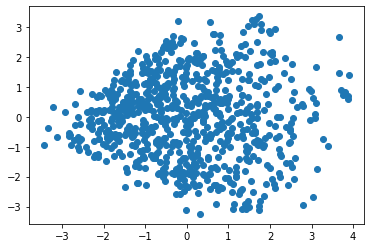

In [15]:
plt.scatter(reduced_data['A'],reduced_data['B'])
plt.show()

In [16]:
eig_vals.sort()

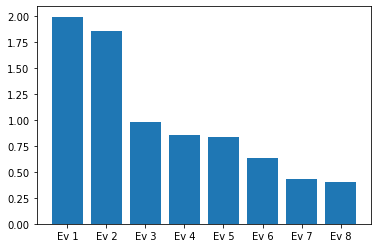

In [17]:
plt.bar([f'Ev {i}' for i in range(1,9)],[eig_vals[8-i] for i in range(1,9)])
plt.show()

In [18]:

reconstructed_df = pd.DataFrame(pca.inverse_transform(reduced_data),columns=cols)
reconstructed_df

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,0.796461,0.667858,0.771297,0.113047,0.073836,0.521977,0.192290,0.943163
1,-0.591935,-0.656352,-0.675474,-0.344959,-0.294870,-0.627492,-0.289229,-0.740529
2,0.675550,0.018382,0.303964,-0.798017,-0.759517,-0.377900,-0.338135,0.664451
3,-0.945499,-0.747766,-0.886828,-0.060701,-0.020053,-0.552177,-0.187060,-1.108509
4,-1.119222,-0.060408,-0.522734,1.273269,1.213405,0.581242,0.532815,-1.108239
...,...,...,...,...,...,...,...,...
763,1.031844,0.987652,1.077472,0.346112,0.279286,0.859532,0.361072,1.252174
764,-0.287672,-0.139214,-0.213397,0.125538,0.126345,-0.035798,0.023835,-0.315434
765,-0.101112,-0.146953,-0.137644,-0.115743,-0.102626,-0.159347,-0.081264,-0.135109
766,0.207357,-0.355960,-0.137773,-0.834701,-0.775540,-0.657411,-0.434478,0.114533


In [19]:
loss = np.sum((df_z_scaled-reconstructed_df)**2,axis=1).mean()
loss

4.1487057563524035

In [24]:
error = []
for i in range(2,9):
    pca = PCA(n_components=i)
    reduced_data = pd.DataFrame(pca.fit_transform(df_z_scaled))
    reconstructed_df =pd.DataFrame(pca.inverse_transform(reduced_data),columns=cols) 
    loss = np.sum((df_z_scaled-reconstructed_df)**2,axis=1).mean()
    error.append(loss**0.5)
    print(f'Covariance matrix for l={i} dimensional representation')
    print(pd.DataFrame(np.cov(reduced_data.T)))
   

Covariance matrix for l=2 dimensional representation
          0         1         2         3         4         5         6  \
0  0.566040  0.288038  0.428911 -0.224000 -0.227436  0.091568 -0.033993   
1  0.288038  0.349915  0.348199  0.217654  0.189283  0.351054  0.168661   
2  0.428911  0.348199  0.408038  0.042193  0.022577  0.263942  0.093075   
3 -0.224000  0.217654  0.042193  0.629530  0.587470  0.460318  0.316741   
4 -0.227436  0.189283  0.022577  0.587470  0.548916  0.419901  0.292600   
5  0.091568  0.351054  0.263942  0.460318  0.419901  0.470669  0.272932   
6 -0.033993  0.168661  0.093075  0.316741  0.292600  0.272932  0.172103   
7  0.624157  0.367894  0.505080 -0.164991 -0.175363  0.176256  0.008501   

          7  
0  0.624157  
1  0.367894  
2  0.505080  
3 -0.164991  
4 -0.175363  
5  0.176256  
6  0.008501  
7  0.700674  
Covariance matrix for l=3 dimensional representation
          0         1         2         3         4         5         6  \
0  0.648519  0.28

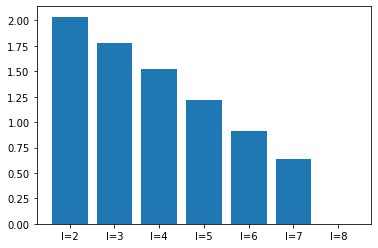

In [25]:
plt.bar([f'l={i}' for i in range(2,9)],error)
plt.show() 

In [22]:
print('Covariance matrix of original data is:-')
pd.DataFrame(np.cov(df_z_scaled.T))

Covariance matrix of original data is:-


,0,1,2,3,4,5,6,7
0,1.000000,0.117692,0.208953,-0.096720,-0.108474,0.028339,0.004519,0.560768
1,0.117692,1.000000,0.204539,0.060034,0.179566,0.228245,0.081613,0.274264
2,0.208953,0.204539,1.000000,0.025645,-0.050956,0.271560,0.022495,0.326372
3,-0.096720,0.060034,0.025645,1.000000,0.472714,0.373726,0.152763,-0.101397
4,-0.108474,0.179566,-0.050956,0.472714,1.000000,0.171503,0.198580,-0.073726
5,0.028339,0.228245,0.271560,0.373726,0.171503,1.000000,0.123776,0.077668
6,0.004519,0.081613,0.022495,0.152763,0.198580,0.123776,1.000000,0.036109
7,0.560768,0.274264,0.326372,-0.101397,-0.073726,0.077668,0.036109,1.000000


In [23]:
covM = df_z_scaled.cov()
covM

,pregs,plas,pres,skin,test,BMI,pedi,Age
pregs,1.000000,0.117692,0.208953,-0.096720,-0.108474,0.028339,0.004519,0.560768
plas,0.117692,1.000000,0.204539,0.060034,0.179566,0.228245,0.081613,0.274264
pres,0.208953,0.204539,1.000000,0.025645,-0.050956,0.271560,0.022495,0.326372
skin,-0.096720,0.060034,0.025645,1.000000,0.472714,0.373726,0.152763,-0.101397
test,-0.108474,0.179566,-0.050956,0.472714,1.000000,0.171503,0.198580,-0.073726
BMI,0.028339,0.228245,0.271560,0.373726,0.171503,1.000000,0.123776,0.077668
pedi,0.004519,0.081613,0.022495,0.152763,0.198580,0.123776,1.000000,0.036109
Age,0.560768,0.274264,0.326372,-0.101397,-0.073726,0.077668,0.036109,1.000000
